[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/sparse_autoregression_yosemite_temps.ipynb)

# Sparse Autoregression
Here we fit NeuralProphet to data with 5-minute resolution (daily temperatures at Yosemite). 
This is a continuation of the example notebook `autoregression_yosemite_temps`, focusing on sparsity.


In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "yosemite_temps.csv")
# df.head(3)

## Sparsifying the AR coefficients
The autoregression component of NeuralProphet is defined as a AR-Net ([paper](https://arxiv.org/abs/1911.12436), [github](https://github.com/ourownstory/AR-Net)).
Thus, we can set `ar_reg` to a number greater zero, if we like to induce sparsity in the AR coefficients. 

However, fitting a model with multiple components and regularizations can be harder to fit and in some cases you may need to take manual control over the training hyperparameters.


We will start by setting regularization to 0.1

In [3]:
m = NeuralProphet(
    n_lags=6*12,
    n_forecasts=3*12,
    n_changepoints=0,
    weekly_seasonality=False,
    daily_seasonality=False,
    learning_rate=0.01,
    ar_reg=0.1,
)
metrics = m.fit(df, freq='5min') # validate_each_epoch=True, plot_live_loss=True

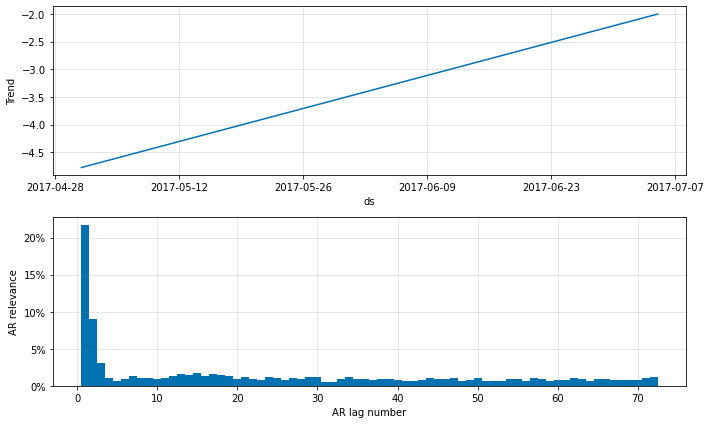

In [4]:
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

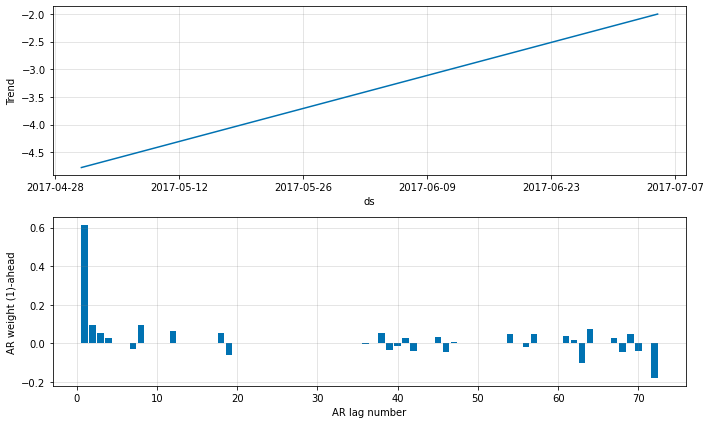

In [5]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

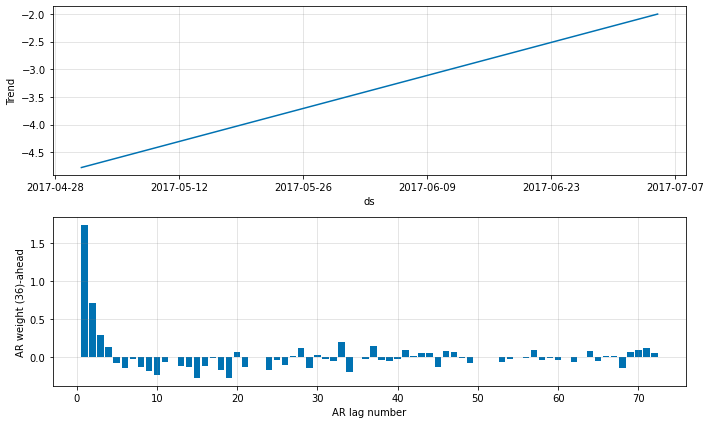

In [6]:
m = m.highlight_nth_step_ahead_of_each_forecast(36)
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

## Further reducing the non-zero AR-coefficents
By setting the ar_reg higher, we can further reduce the number of non-zero weights.
Here we set it to 1

In [7]:
m = NeuralProphet(
    n_lags=6*12,
    n_forecasts=3*12,
    n_changepoints=0,
    daily_seasonality=False,
    weekly_seasonality=False,
    learning_rate=0.01,
    ar_reg=1,
)
metrics = m.fit(df, freq='5min')

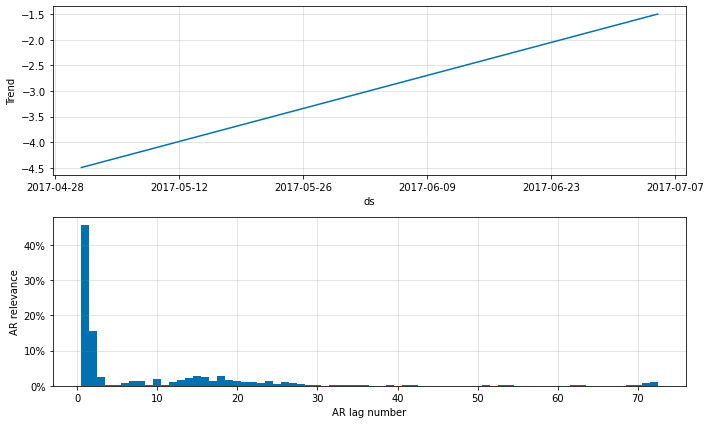

In [8]:
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

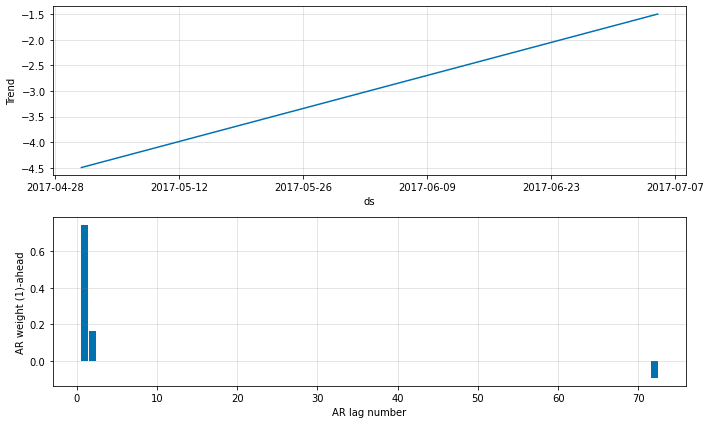

In [9]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

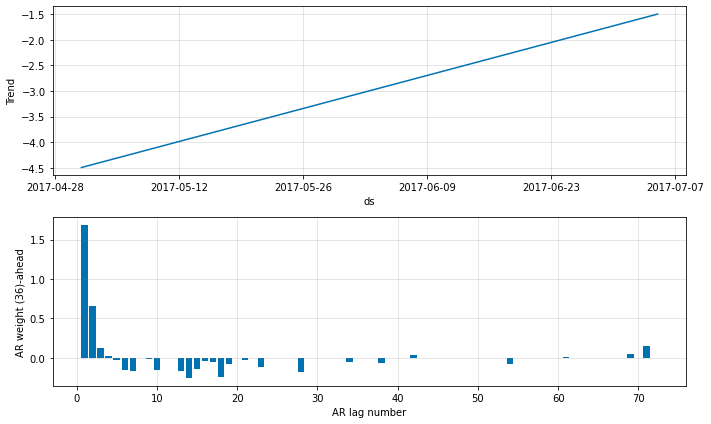

In [10]:
m = m.highlight_nth_step_ahead_of_each_forecast(36)
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

## Extreme sparsity
The higher we set `ar_reg`, the fewer non-zero weiths are fitted by the model. Here we set it to 10, which should lead to a single non-zero lag.

Note: Extreme values can lead to training instability.

In [11]:
m = NeuralProphet(
    n_lags=6*12,
    n_forecasts=3*12,
    n_changepoints=0,
    daily_seasonality=False,
    weekly_seasonality=False,
    learning_rate=0.01,
    ar_reg=10,
)
metrics = m.fit(df, freq='5min')

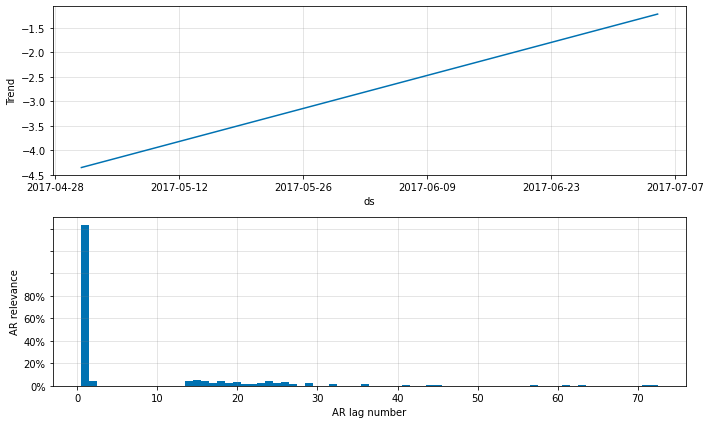

In [12]:
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

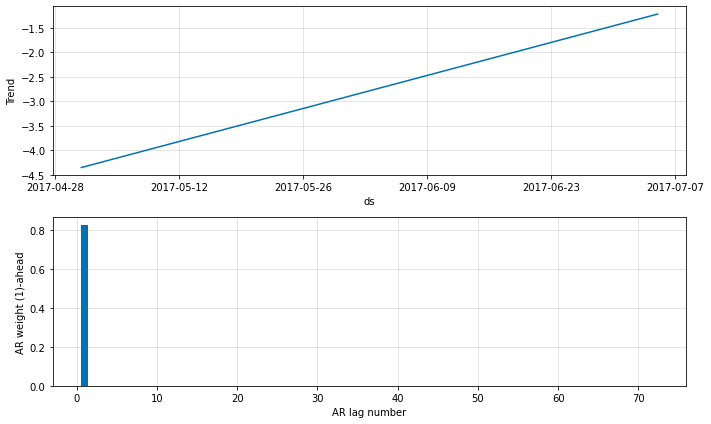

In [13]:
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()

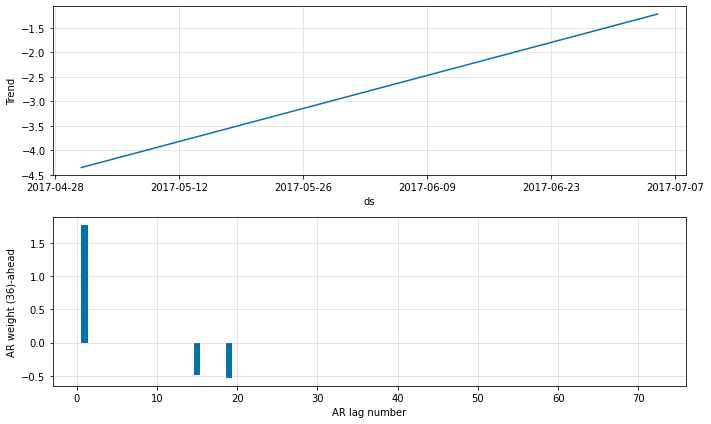

In [14]:
m = m.highlight_nth_step_ahead_of_each_forecast(36)
fig_param = m.plot_parameters()
fig_param = m.plot_parameters(plotting_backend="plotly").show()